       geo_fips_code          value     date_label  value_95_ci_low  \
count   1.886670e+05  189979.000000  189979.000000    118670.000000   
mean    2.873779e+06     821.530158    2016.193732       458.349061   
std     1.698817e+06    4587.718159       3.648183      1794.511977   
min     4.550000e+05      -0.755277    2010.000000     -3173.388887   
25%     8.200000e+05      10.871142    2013.000000         9.422178   
50%     2.938000e+06      26.000000    2016.000000        21.953778   
75%     4.748000e+06      77.094130    2019.000000       100.635606   
max     5.553000e+06  123781.000000    2022.000000     28811.129300   

       value_95_ci_high  value_90_ci_low  value_90_ci_high  
count     118682.000000              0.0               0.0  
mean         552.654749              NaN               NaN  
std         2091.499222              NaN               NaN  
min            0.458320              NaN               NaN  
25%           15.465618              NaN               

C:\Users\jaewonchoi\AppData\Local\Temp\ipykernel_2576\3977499699.py:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

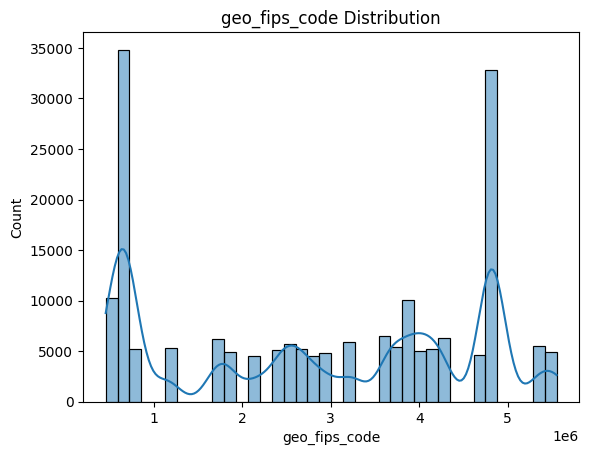

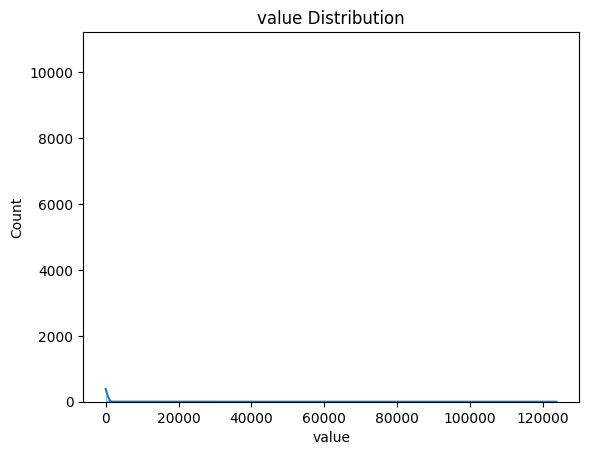

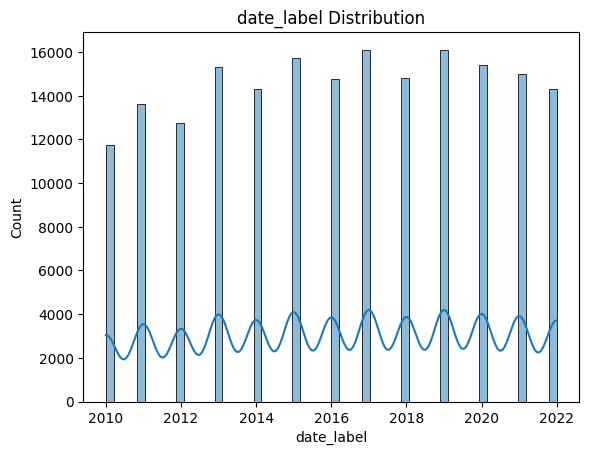

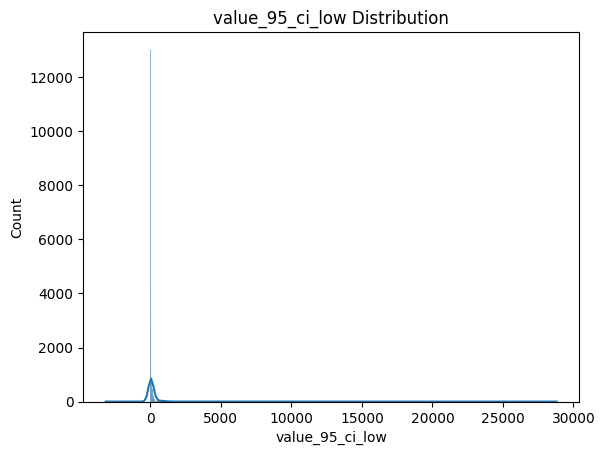

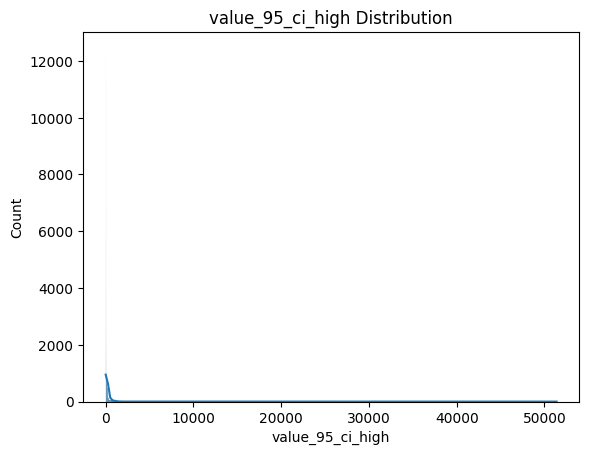

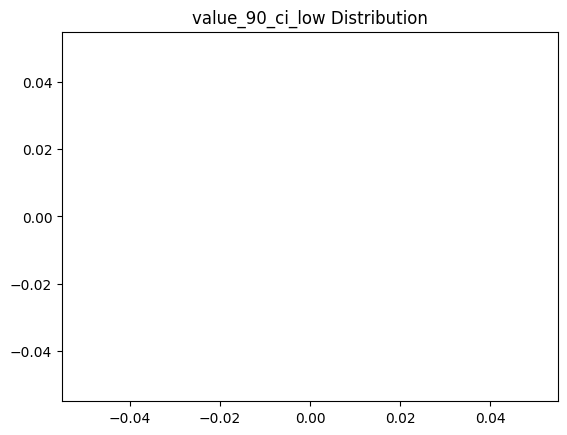

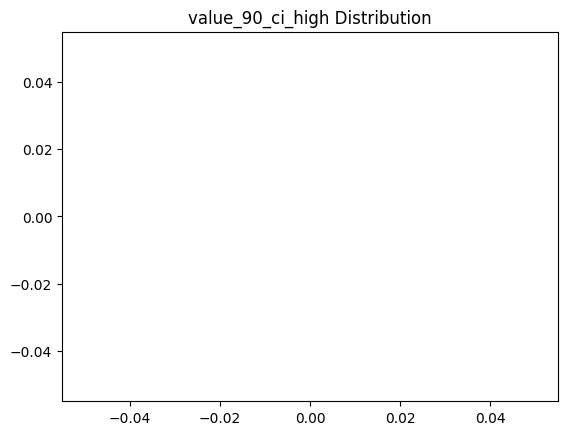

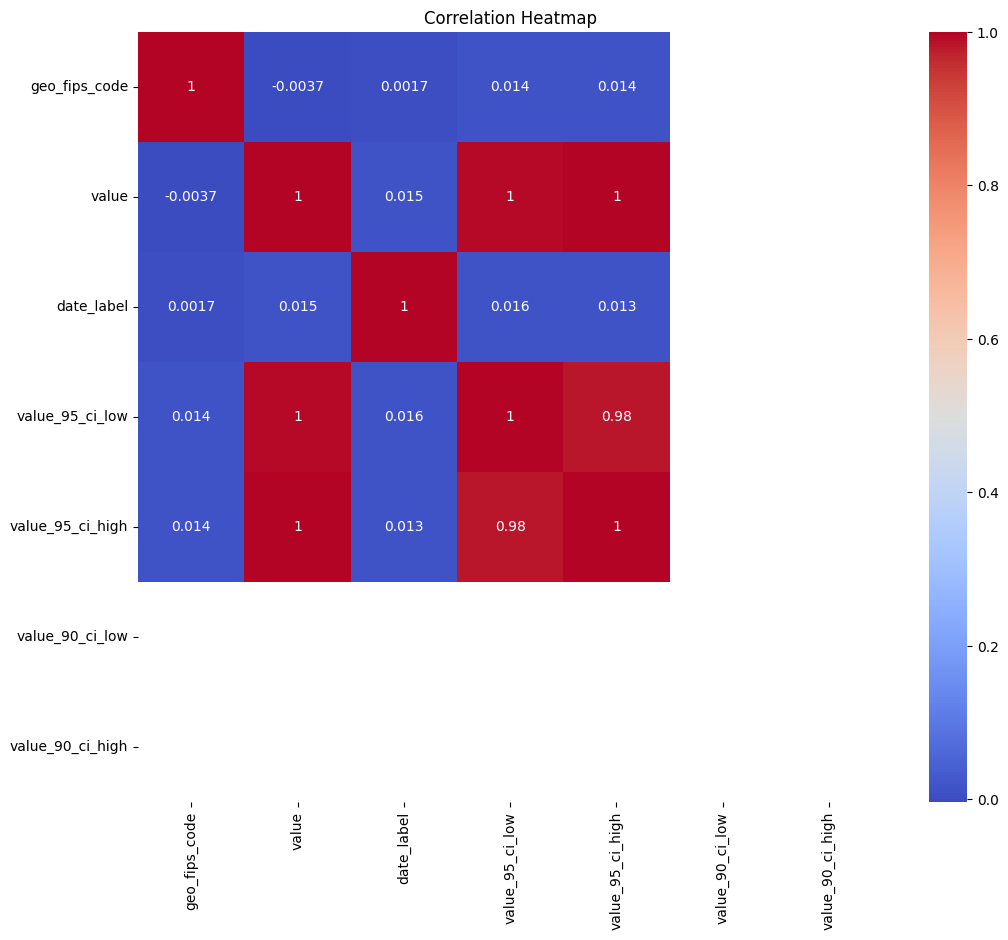

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# CSV 파일 읽기
# low_memory=False 옵션 사용
data = pd.read_csv('project/BigCitiesHealth.csv', low_memory=False)

# 데이터 요약 통계량
print(data.describe())

# 결측치 확인
print(data.isnull().sum())

# 범주형 변수 분포
for col in data.select_dtypes(include='object').columns:
    print(f"{col} value counts:")
    print(data[col].value_counts())
    
# 연속형 변수 분포 시각화
for col in data.select_dtypes(exclude='object').columns:
    plt.figure()
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f"{col} Distribution")
    
# 상관관계 분석
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

In [8]:
# 각 열의 결측치 수 출력
null_counts = data.isnull().sum()
print(null_counts)

metric_item_label                       0
metric_cat_label                        0
metric_subcat_label                     0
metric_item_label_subtitle              0
metric_cat_item_yaxis_label             0
metric_source_desc_label_fn             0
metric_source_desc_label_url_fn         0
geo_label_city                          0
geo_label_state                      1312
geo_label_citystate                     0
geo_fips_code                        1312
value                                   0
date_label                              0
geo_label_proxy_or_real                 0
geo_label_proxy_footnote           173175
geo_fips_desc                           0
date_label_proxy_or_real                0
date_label_proxy_footnote          135220
value_ci_flag_yesno                     0
value_95_ci_low                     71309
value_95_ci_high                    71297
value_90_ci_low                    189979
value_90_ci_high                   189979
geo_strata_region                 

In [11]:
# Index 개수 출력
print(f"Number of index values: {len(data.index)}")

# Column 개수 출력
print(f"Number of columns: {len(data.columns)}")

Number of index values: 189979
Number of columns: 31


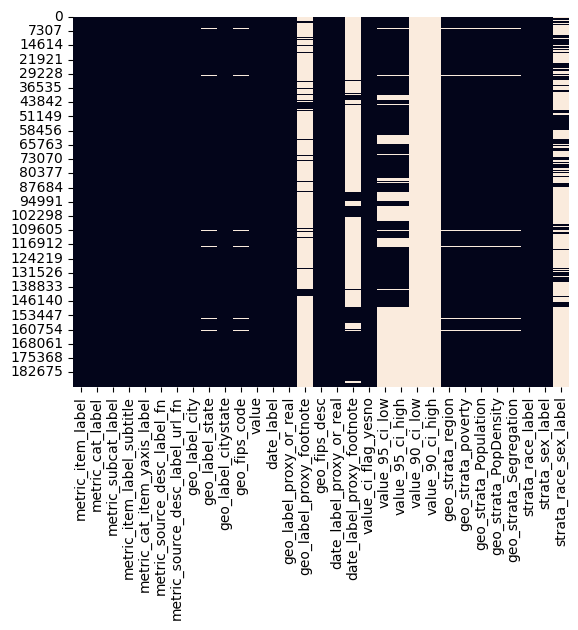

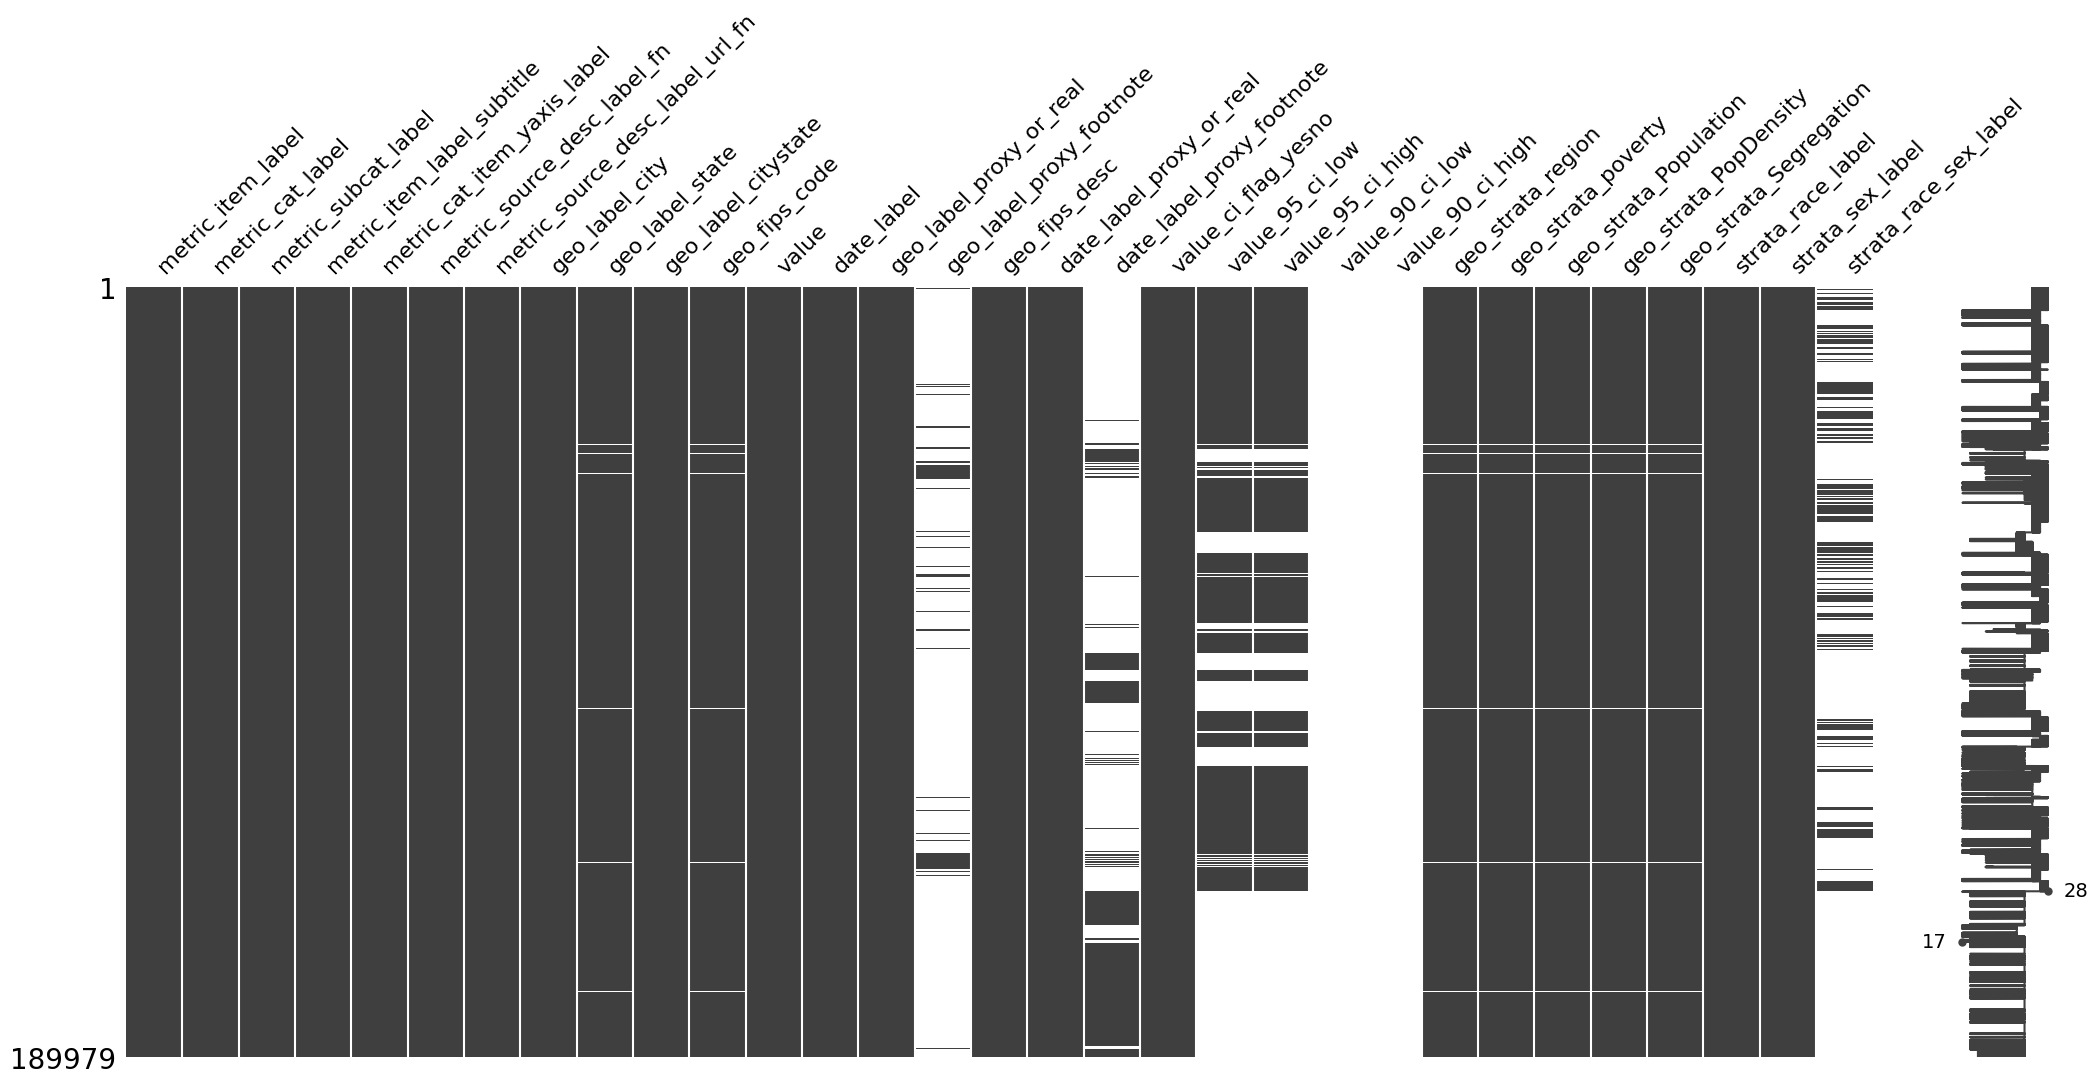

In [12]:
# 결측치 히트맵 시각화
sns.heatmap(data.isna(), cbar=False)
plt.show()

# 결측치 패턴 시각화
import missingno as msno
msno.matrix(data)
plt.show()

In [13]:
# 'metric_subcat_label' 컬럼의 값 분포 확인
value_counts = data['metric_subcat_label'].value_counts()
print(value_counts)

Deaths                          33959
Cancer                          20290
Substance Use                   12924
Cardiovascular Disease          12801
Income                           9165
Respiratory Infection            8855
Sexually Transmitted Disease     8153
Births                           7966
Mental Health                    7790
Diabetes and Obesity             6996
Housing                          6742
Income-related                   6314
Transportation                   5264
Crime Incidents                  5207
Life Expectancy at Birth         5004
Health Insurance                 4220
Population                       3609
Education                        3211
Physical Activity                3122
Disability                       2743
Active Transportation            2686
Racial Segregation Indices       1872
Heat and Disasters               1846
Language and Nativity            1548
Lead Poisoning                   1484
School Violence                  1051
Dietary Qual

In [14]:
value_counts = data['geo_label_proxy_footnote'].value_counts()
print(value_counts)

Data are for school districts    10065
County level data were used       6675
Average for BCHC cities             52
Average of all BCHC cities          12
Name: geo_label_proxy_footnote, dtype: int64


In [16]:
# 결측치 큰것 중 채워진 컬럼 갯수 확인 1
value_counts = data['geo_label_proxy_footnote'].value_counts()
print(value_counts)

# 'metric_subcat_label' 컬럼의 결측치 개수 확인
null_count = data['geo_label_proxy_footnote'].isnull().sum()
print(f"Number of missing values in 'geo_label_proxy_footnote' column: {null_count}")

Data are for school districts    10065
County level data were used       6675
Average for BCHC cities             52
Average of all BCHC cities          12
Name: geo_label_proxy_footnote, dtype: int64
Number of missing values in 'geo_label_proxy_footnote' column: 173175


In [17]:
# 결측치 큰것 중 채워진 컬럼 갯수 확인 2
value_counts = data['date_label_proxy_footnote'].value_counts()
print(value_counts)

# 'metric_subcat_label' 컬럼의 결측치 개수 확인
null_count = data['date_label_proxy_footnote'].isnull().sum()
print(f"Number of missing values in 'date_label_proxy_footnote' column: {null_count}")

ACS 5-year estimates- 2018-2022                                       19420
ACS 5-year estimates- 2013-2017                                       19420
ACS 5-year estimates- 2008-2012                                        7746
Data were missing. The data shown are for adjacent available year.     6301
Calculated using ACS 5-year estimates- 2018-2022                        720
Calculated using ACS 5-year estimates- 2013-2017                        720
Calculated using ACS 5-year estimates- 2008-2012                        432
Name: date_label_proxy_footnote, dtype: int64
Number of missing values in 'date_label_proxy_footnote' column: 135220


In [19]:
## 신뢰구간 95% 이하 결측치 비율 계산

# 결측치 비율 확인
missing_value_percentage = data['value_95_ci_low'].isnull().mean() * 100
print(missing_value_percentage)

37.535201259086534


In [20]:
## 신뢰구간 95% 이상 결측치 비율 계산

# 결측치 비율 확인
missing_value_percentage = data['value_95_ci_high'].isnull().mean() * 100
print(missing_value_percentage)

37.52888477147474


In [22]:
# 1. 결측치밖에 없는 컬럼 제거
data = data.dropna(axis=1, how='all')

# 2. value_95_ci_low의 결측치가 있는 row 제거
data = data.dropna(subset=['value_95_ci_low'])

# 결과 확인
print(data.info())
print(data.head())

# 전처리된 데이터 저장
cleaned_file_path = 'project/BigCitiesHealth_cleaned.csv'
data.to_csv(cleaned_file_path, index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118670 entries, 0 to 149092
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   metric_item_label                118670 non-null  object 
 1   metric_cat_label                 118670 non-null  object 
 2   metric_subcat_label              118670 non-null  object 
 3   metric_item_label_subtitle       118670 non-null  object 
 4   metric_cat_item_yaxis_label      118670 non-null  object 
 5   metric_source_desc_label_fn      118670 non-null  object 
 6   metric_source_desc_label_url_fn  118670 non-null  object 
 7   geo_label_city                   118670 non-null  object 
 8   geo_label_state                  118472 non-null  object 
 9   geo_label_citystate              118670 non-null  object 
 10  geo_fips_code                    118472 non-null  float64
 11  value                            118670 non-null  float64
 12  da

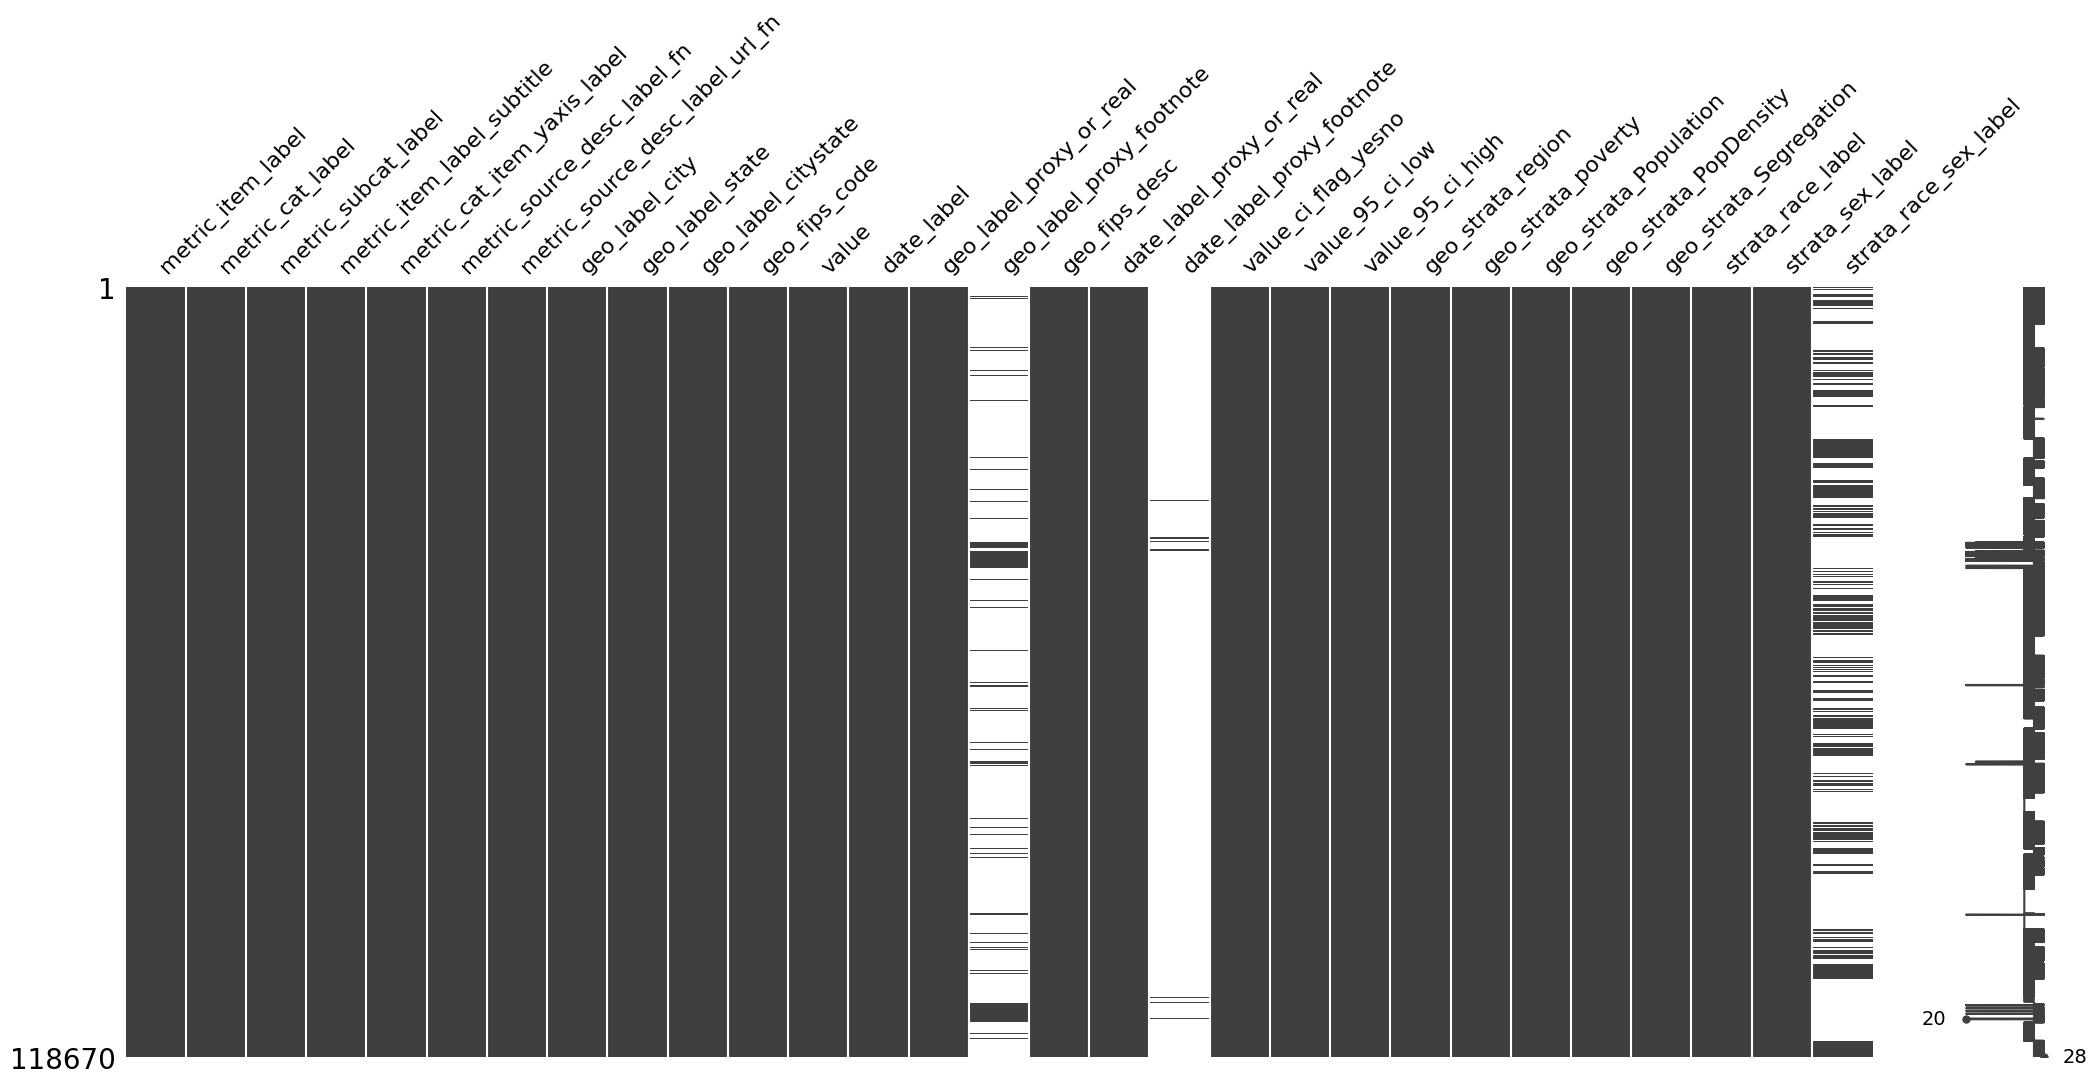

metric_item_label                       0
metric_cat_label                        0
metric_subcat_label                     0
metric_item_label_subtitle              0
metric_cat_item_yaxis_label             0
metric_source_desc_label_fn             0
metric_source_desc_label_url_fn         0
geo_label_city                          0
geo_label_state                       198
geo_label_citystate                     0
geo_fips_code                         198
value                                   0
date_label                              0
geo_label_proxy_or_real                 0
geo_label_proxy_footnote           105501
geo_fips_desc                           0
date_label_proxy_or_real                0
date_label_proxy_footnote          116947
value_ci_flag_yesno                     0
value_95_ci_low                         0
value_95_ci_high                        0
geo_strata_region                     198
geo_strata_poverty                    198
geo_strata_Population             

In [25]:
#전처리 파일 열기

data_cleaned = pd.read_csv('project/BigCitiesHealth_cleaned.csv', low_memory=False)

msno.matrix(data_cleaned)
plt.show()

null_counts = data_cleaned.isnull().sum()
print(null_counts)

In [26]:
# 전처리 후 Index 개수 출력
print(f"Number of index values: {len(data_cleaned.index)}")

# 전처리 후 Column 개수 출력
print(f"Number of columns: {len(data_cleaned.columns)}")

Number of index values: 118670
Number of columns: 29


In [30]:
## geo_label_proxy_footnote, date_label_proxy_footnote, strata_race_sex_label  는 뭘로 채워져있지?
value_counts1 = data_cleaned['geo_label_proxy_footnote'].value_counts()
print(value_counts1)

Data are for school districts    7447
County level data were used      5722
Name: geo_label_proxy_footnote, dtype: int64


In [31]:
value_counts2 = data_cleaned['date_label_proxy_footnote'].value_counts()
print(value_counts2)

Data were missing. The data shown are for adjacent available year.    1723
Name: date_label_proxy_footnote, dtype: int64


In [32]:
value_counts3 = data_cleaned['strata_race_sex_label'].value_counts()
print(value_counts3)

White Male         7159
Black Male         7113
White Female       6394
Hispanic Male      6061
Black Female       6019
Hispanic Female    4659
Asian/PI Male      3737
Asian/PI Female    3128
Name: strata_race_sex_label, dtype: int64


In [34]:
## 성별 및 인종 열 제거  -> 결측채우기도 어렵고 별 쓸모없음

# 인종 및 성별 관련 열 제거
columns_to_remove = ['strata_race_sex_label']
data_cleaned = data_cleaned.drop(columns=columns_to_remove, errors='ignore')

# 결과 확인
print(data_cleaned.info())
print(data_cleaned.head())

# 인종 및 성별 열을 제거한 데이터 저장
final_cleaned_file_path = 'project/BigCitiesHealth_cleaned2.csv'  # 실제 파일 경로로 수정하세요
data_cleaned.to_csv(final_cleaned_file_path, index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118670 entries, 0 to 118669
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   metric_item_label                118670 non-null  object 
 1   metric_cat_label                 118670 non-null  object 
 2   metric_subcat_label              118670 non-null  object 
 3   metric_item_label_subtitle       118670 non-null  object 
 4   metric_cat_item_yaxis_label      118670 non-null  object 
 5   metric_source_desc_label_fn      118670 non-null  object 
 6   metric_source_desc_label_url_fn  118670 non-null  object 
 7   geo_label_city                   118670 non-null  object 
 8   geo_label_state                  118472 non-null  object 
 9   geo_label_citystate              118670 non-null  object 
 10  geo_fips_code                    118472 non-null  float64
 11  value                            118670 non-null  float64
 12  da

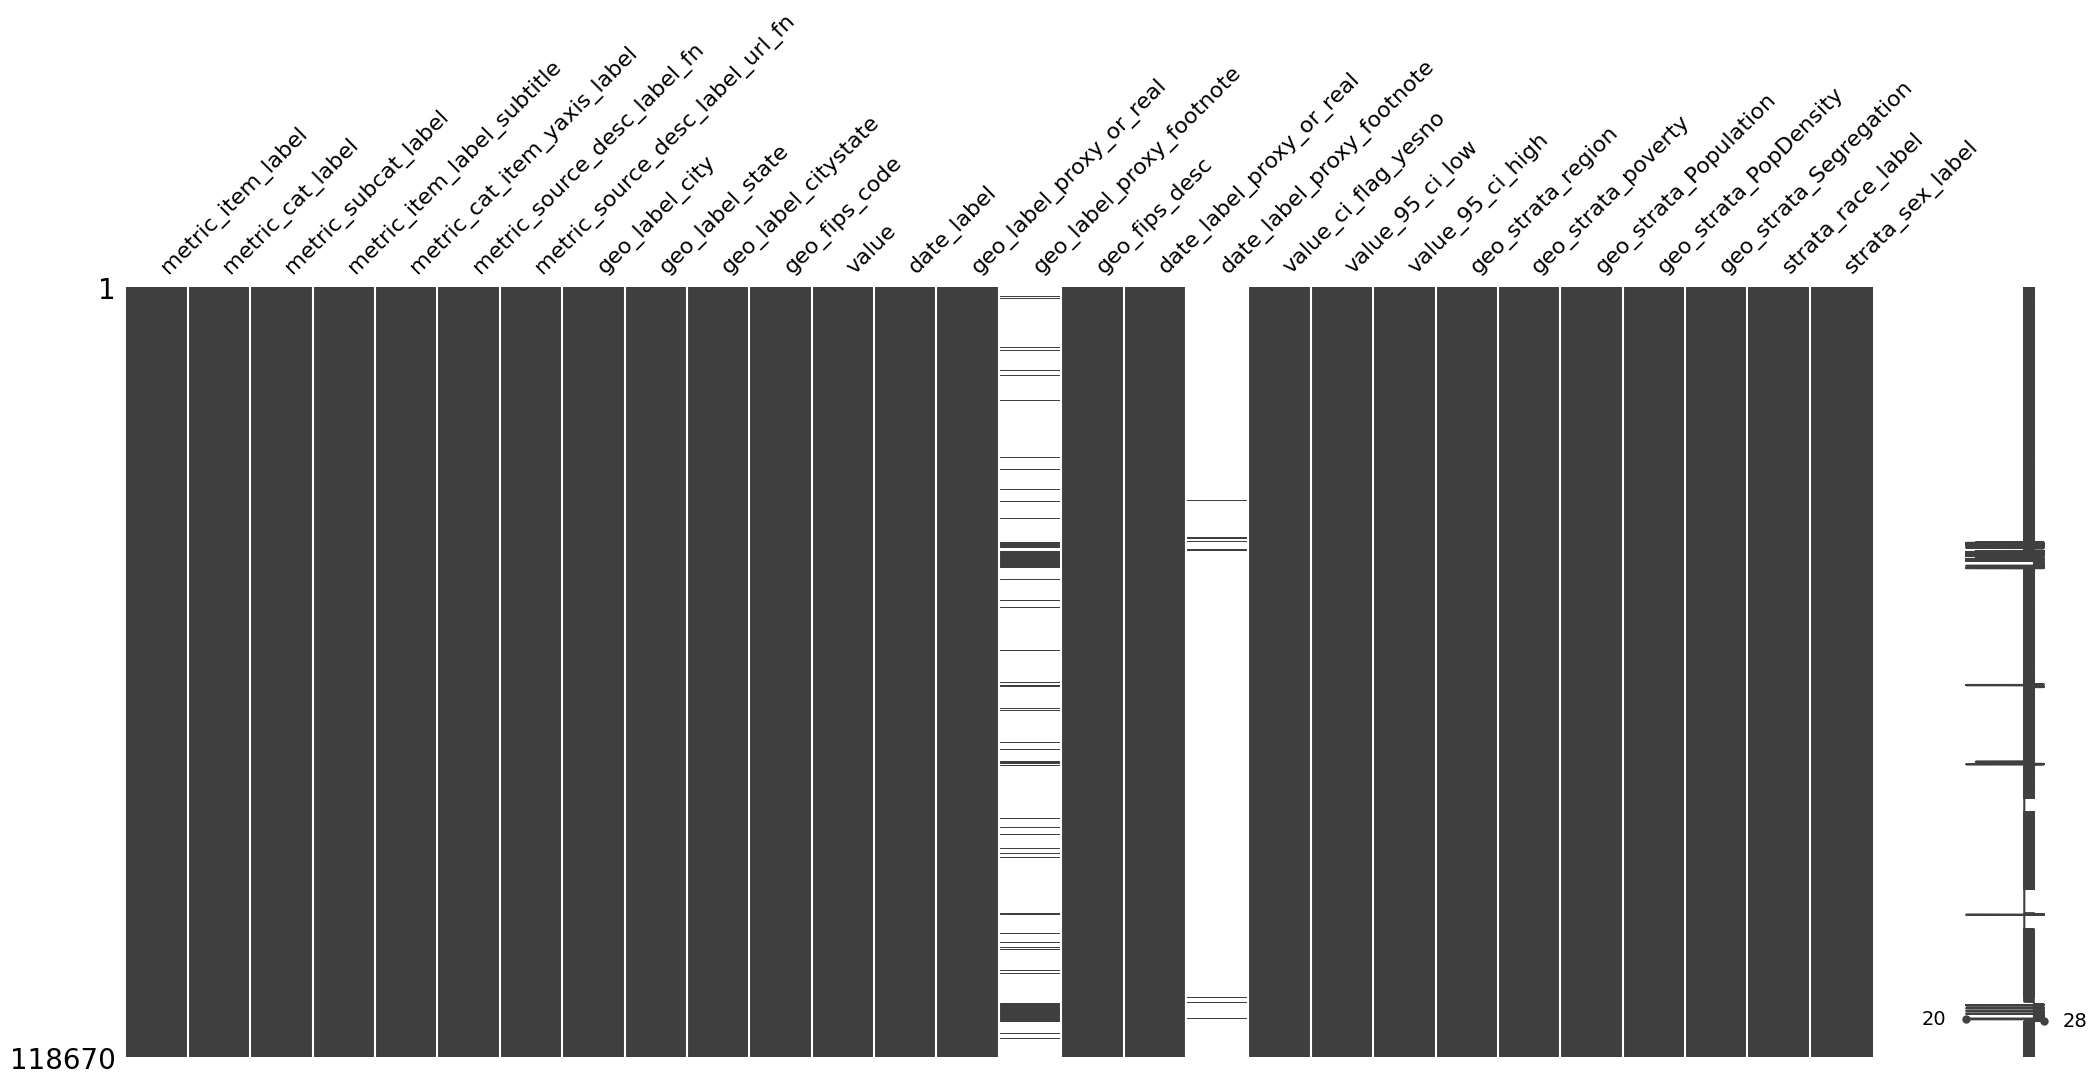

metric_item_label                       0
metric_cat_label                        0
metric_subcat_label                     0
metric_item_label_subtitle              0
metric_cat_item_yaxis_label             0
metric_source_desc_label_fn             0
metric_source_desc_label_url_fn         0
geo_label_city                          0
geo_label_state                       198
geo_label_citystate                     0
geo_fips_code                         198
value                                   0
date_label                              0
geo_label_proxy_or_real                 0
geo_label_proxy_footnote           105501
geo_fips_desc                           0
date_label_proxy_or_real                0
date_label_proxy_footnote          116947
value_ci_flag_yesno                     0
value_95_ci_low                         0
value_95_ci_high                        0
geo_strata_region                     198
geo_strata_poverty                    198
geo_strata_Population             

In [35]:
## 2차 처리 파일 열기

data_cleaned2 = pd.read_csv('project/BigCitiesHealth_cleaned2.csv', low_memory=False)

msno.matrix(data_cleaned2)
plt.show()

null_counts = data_cleaned2.isnull().sum()
print(null_counts)

In [37]:
## metric_source_desc_label_fn, metric_source_desc_label_fn도 쳐내자

# 전처리된 데이터 로드
cleaned_file_path = 'project/BigCitiesHealth_cleaned2.csv'
data_cleaned = pd.read_csv(cleaned_file_path)

# metric_source_desc_label_fn 및 metric_source_desc_label_url_fn 열 제거
columns_to_remove = ['metric_source_desc_label_fn', 'metric_source_desc_label_url_fn']
data_cleaned = data_cleaned.drop(columns=columns_to_remove, errors='ignore')

# 결과 확인
print(data_cleaned.info())
print(data_cleaned.head())

# 인종 및 성별 열을 제거한 데이터 저장
final_cleaned_file_path = 'project/BigCitiesHealth_cleaned3.csv'  # 실제 파일 경로로 수정하세요
data_cleaned.to_csv(final_cleaned_file_path, index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118670 entries, 0 to 118669
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   metric_item_label            118670 non-null  object 
 1   metric_cat_label             118670 non-null  object 
 2   metric_subcat_label          118670 non-null  object 
 3   metric_item_label_subtitle   118670 non-null  object 
 4   metric_cat_item_yaxis_label  118670 non-null  object 
 5   geo_label_city               118670 non-null  object 
 6   geo_label_state              118472 non-null  object 
 7   geo_label_citystate          118670 non-null  object 
 8   geo_fips_code                118472 non-null  float64
 9   value                        118670 non-null  float64
 10  date_label                   118670 non-null  int64  
 11  geo_label_proxy_or_real      118670 non-null  object 
 12  geo_label_proxy_footnote     13169 non-null   object 
 13 

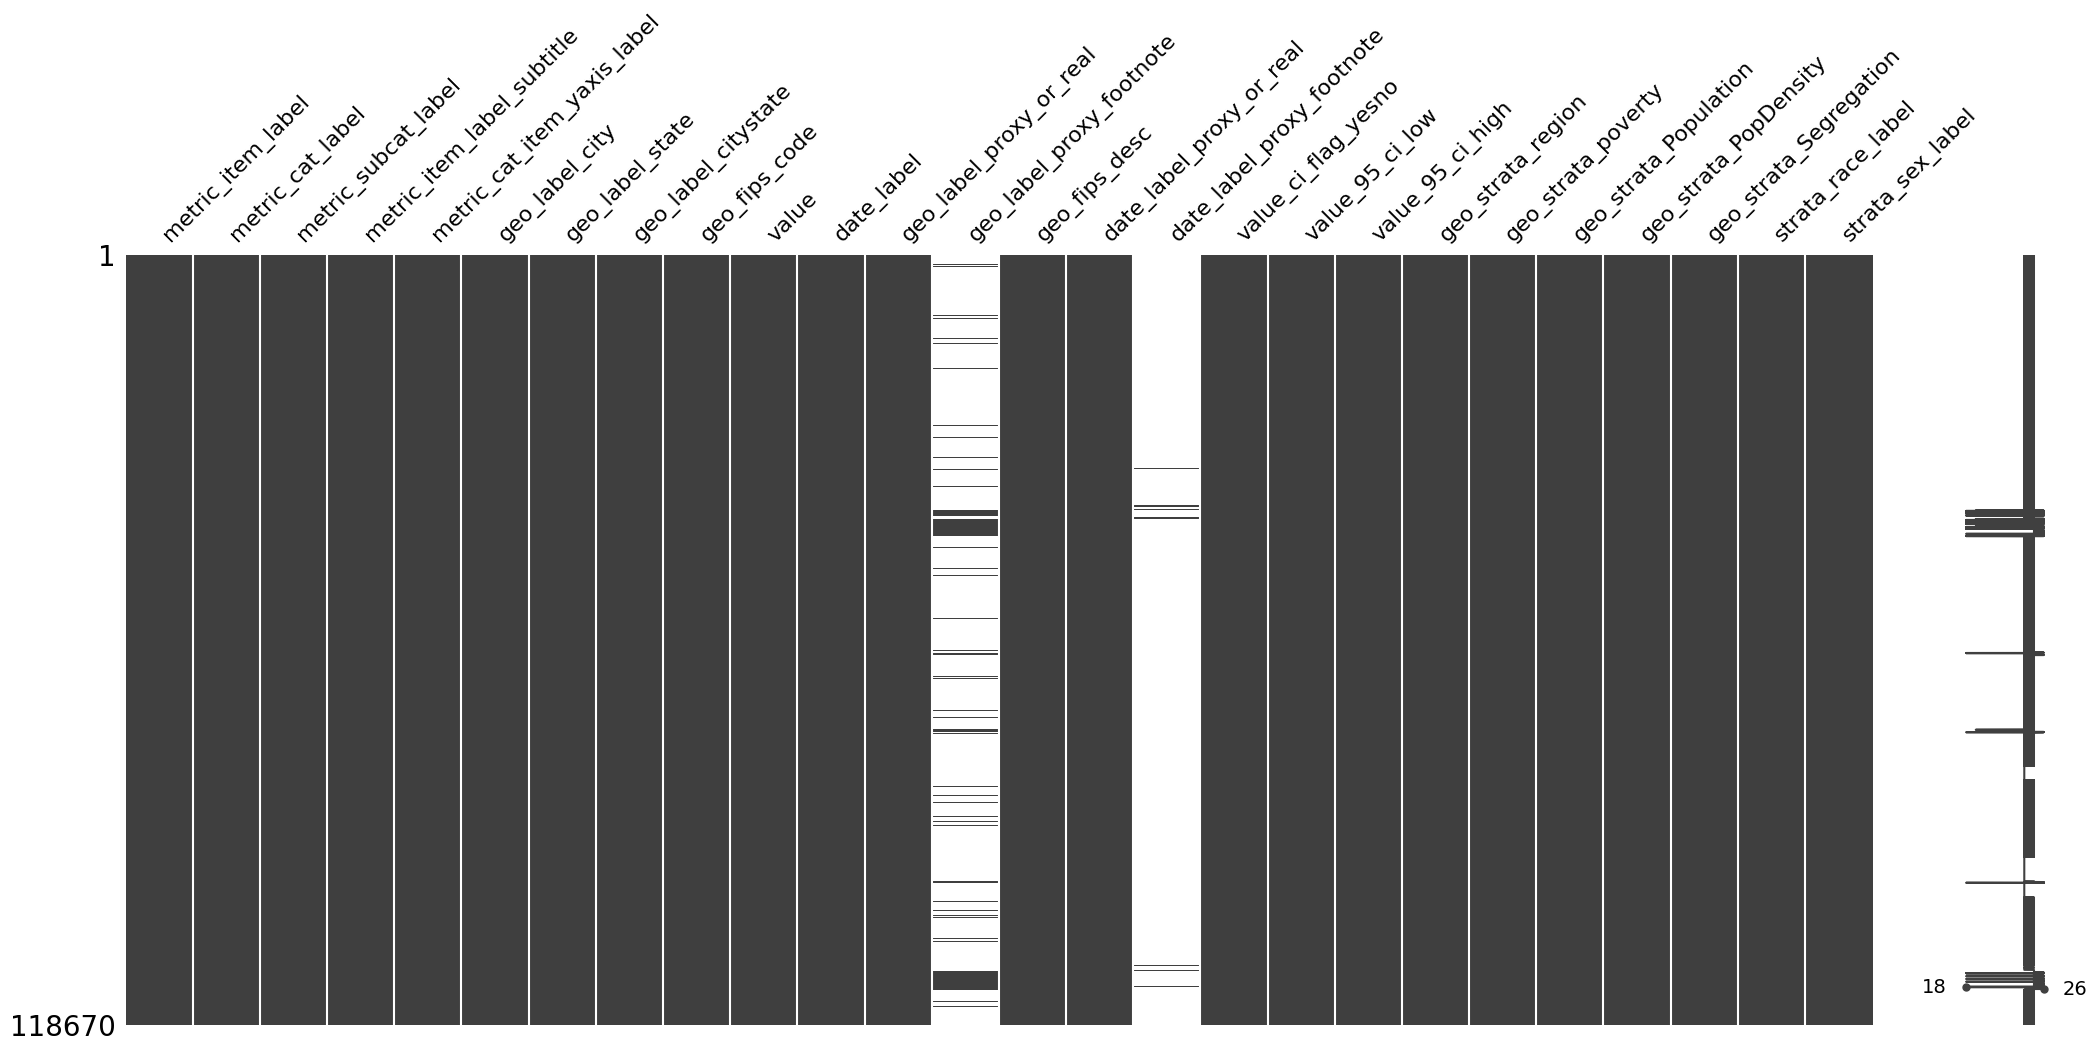

metric_item_label                   0
metric_cat_label                    0
metric_subcat_label                 0
metric_item_label_subtitle          0
metric_cat_item_yaxis_label         0
geo_label_city                      0
geo_label_state                   198
geo_label_citystate                 0
geo_fips_code                     198
value                               0
date_label                          0
geo_label_proxy_or_real             0
geo_label_proxy_footnote       105501
geo_fips_desc                       0
date_label_proxy_or_real            0
date_label_proxy_footnote      116947
value_ci_flag_yesno                 0
value_95_ci_low                     0
value_95_ci_high                    0
geo_strata_region                 198
geo_strata_poverty                198
geo_strata_Population             198
geo_strata_PopDensity             198
geo_strata_Segregation            198
strata_race_label                   0
strata_sex_label                    0
dtype: int64

In [39]:
## 3차 전처리 데이터 확인

data_cleaned3 = pd.read_csv('project/BigCitiesHealth_cleaned3.csv', low_memory=False)

msno.matrix(data_cleaned3)
plt.show()

null_counts = data_cleaned3.isnull().sum()
print(null_counts)

In [40]:
# 각 컬럼별 중복된 값의 종류와 개수 확인
duplicate_summary = {}
for column in data_cleaned3.columns:
    duplicate_counts = data_cleaned3[column].value_counts()
    duplicates = duplicate_counts[duplicate_counts > 1]
    if not duplicates.empty:
        duplicate_summary[column] = duplicates

# 결과 출력
for column, duplicates in duplicate_summary.items():
    print(f"컬럼 '{column}'의 중복된 값:")
    print(duplicates)
    print()

# 예시: 특정 컬럼의 중복 값과 개수를 데이터프레임으로 변환하여 확인할 수 있음
for column, duplicates in duplicate_summary.items():
    df_duplicates = duplicates.reset_index()
    df_duplicates.columns = [column, 'count']
    print(f"\n컬럼 '{column}'의 중복 값과 개수:")
    print(df_duplicates)

컬럼 'metric_item_label'의 중복된 값:
Premature Death                  6825
Injury Deaths                    6392
All Cancer Deaths                6220
Deaths from All Causes           6219
Cardiovascular Disease Deaths    6182
Heart Disease Deaths             6125
Diabetes Deaths                  5476
Lung Cancer Deaths               5475
Drug Overdose Deaths             5450
Suicide                          5137
Motor Vehicle Deaths             5112
Colorectal Cancer Deaths         5044
Gun Deaths (Firearms)            4904
Pneumonia or Influenza Deaths    4827
Opioid Overdose Deaths           4814
Homicides                        4740
HIV-Related Deaths               3368
Low Birthweight                  2275
Teen Births                      2235
Prenatal Care                    2185
Breast Cancer Deaths             1773
Prostate Cancer Deaths           1713
Infant Deaths                    1470
COVID-19 Deaths                  1396
Preterm Births                   1225
Maternal Deaths    

In [41]:
## geo_label_proxy_footnote, date_label_proxy_footnote도 크게 의미없는듯... -> 자료 출처 정도??

# 전처리된 데이터 로드
cleaned_file_path = 'project/BigCitiesHealth_cleaned3.csv'
data_cleaned = pd.read_csv(cleaned_file_path)

# metric_source_desc_label_fn 및 metric_source_desc_label_url_fn 열 제거
columns_to_remove = ['geo_label_proxy_footnote', 'date_label_proxy_footnote']
data_cleaned = data_cleaned.drop(columns=columns_to_remove, errors='ignore')

# 결과 확인
print(data_cleaned.info())
print(data_cleaned.head())

# 인종 및 성별 열을 제거한 데이터 저장
final_cleaned_file_path = 'project/BigCitiesHealth_cleaned4.csv' 
data_cleaned.to_csv(final_cleaned_file_path, index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118670 entries, 0 to 118669
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   metric_item_label            118670 non-null  object 
 1   metric_cat_label             118670 non-null  object 
 2   metric_subcat_label          118670 non-null  object 
 3   metric_item_label_subtitle   118670 non-null  object 
 4   metric_cat_item_yaxis_label  118670 non-null  object 
 5   geo_label_city               118670 non-null  object 
 6   geo_label_state              118472 non-null  object 
 7   geo_label_citystate          118670 non-null  object 
 8   geo_fips_code                118472 non-null  float64
 9   value                        118670 non-null  float64
 10  date_label                   118670 non-null  int64  
 11  geo_label_proxy_or_real      118670 non-null  object 
 12  geo_fips_desc                118670 non-null  object 
 13 

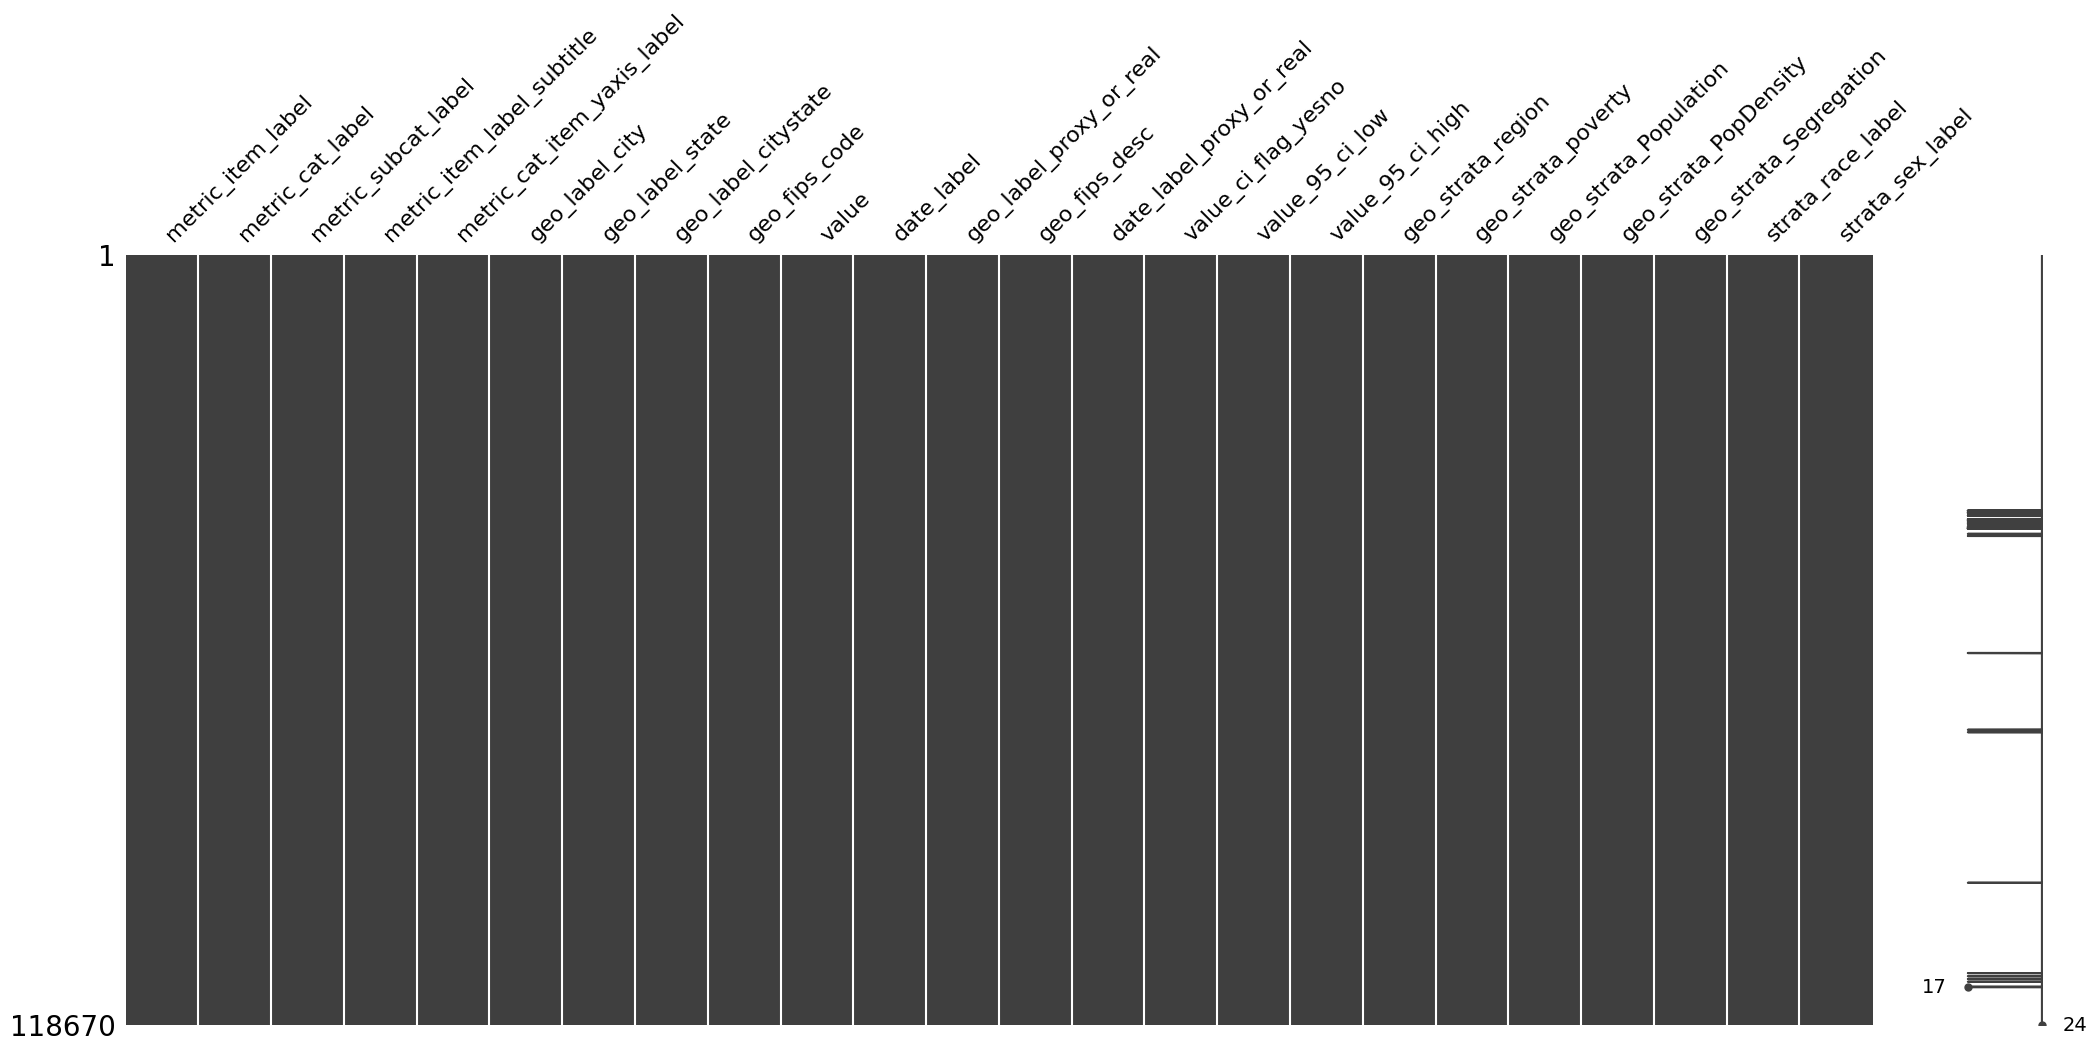

metric_item_label                0
metric_cat_label                 0
metric_subcat_label              0
metric_item_label_subtitle       0
metric_cat_item_yaxis_label      0
geo_label_city                   0
geo_label_state                198
geo_label_citystate              0
geo_fips_code                  198
value                            0
date_label                       0
geo_label_proxy_or_real          0
geo_fips_desc                    0
date_label_proxy_or_real         0
value_ci_flag_yesno              0
value_95_ci_low                  0
value_95_ci_high                 0
geo_strata_region              198
geo_strata_poverty             198
geo_strata_Population          198
geo_strata_PopDensity          198
geo_strata_Segregation         198
strata_race_label                0
strata_sex_label                 0
dtype: int64


In [42]:
## 4차 전처리 데이터 확인

data_cleaned4 = pd.read_csv('project/BigCitiesHealth_cleaned4.csv', low_memory=False)

msno.matrix(data_cleaned4)
plt.show()

null_counts = data_cleaned4.isnull().sum()
print(null_counts)

In [43]:
# 각 컬럼별 중복된 값의 종류와 개수 확인
duplicate_summary = {}
for column in data_cleaned4.columns:
    duplicate_counts = data_cleaned4[column].value_counts()
    duplicates = duplicate_counts[duplicate_counts > 1]
    if not duplicates.empty:
        duplicate_summary[column] = duplicates

# 결과 출력
for column, duplicates in duplicate_summary.items():
    print(f"컬럼 '{column}'의 중복된 값:")
    print(duplicates)
    print()

# 예시: 특정 컬럼의 중복 값과 개수를 데이터프레임으로 변환하여 확인할 수 있음
for column, duplicates in duplicate_summary.items():
    df_duplicates = duplicates.reset_index()
    df_duplicates.columns = [column, 'count']
    print(f"\n컬럼 '{column}'의 중복 값과 개수:")
    print(df_duplicates)

컬럼 'metric_item_label'의 중복된 값:
Premature Death                  6825
Injury Deaths                    6392
All Cancer Deaths                6220
Deaths from All Causes           6219
Cardiovascular Disease Deaths    6182
Heart Disease Deaths             6125
Diabetes Deaths                  5476
Lung Cancer Deaths               5475
Drug Overdose Deaths             5450
Suicide                          5137
Motor Vehicle Deaths             5112
Colorectal Cancer Deaths         5044
Gun Deaths (Firearms)            4904
Pneumonia or Influenza Deaths    4827
Opioid Overdose Deaths           4814
Homicides                        4740
HIV-Related Deaths               3368
Low Birthweight                  2275
Teen Births                      2235
Prenatal Care                    2185
Breast Cancer Deaths             1773
Prostate Cancer Deaths           1713
Infant Deaths                    1470
COVID-19 Deaths                  1396
Preterm Births                   1225
Maternal Deaths    

In [44]:
# 피벗 테이블 생성
pivot_table = data_cleaned4.pivot_table(
    values='value',  # 집계할 값
    index='geo_label_city',  # 행 레이블
    columns='metric_cat_item_yaxis_label',  # 열 레이블
    aggfunc='mean'  # 집계 함수 (예: 평균)
)

# 피벗 테이블 결과 확인
print(pivot_table)

# 피벗 테이블을 CSV 파일로 저장
pivot_table_file_path = 'project/project_pivot_table.csv'  # 실제 파일 경로로 수정하세요
pivot_table.to_csv(pivot_table_file_path)

metric_cat_item_yaxis_label  Incidents per 100,000  Per 1,000  \
geo_label_city                                                  
Austin                                    6.251403   4.514647   
Baltimore                                35.680191   7.522319   
Boston                                   12.770370   4.968460   
Charlotte                                10.115656   5.083569   
Chicago                                  21.205147   6.456872   
Cleveland                                28.476797  11.493058   
Columbus                                 16.101046   7.951330   
Dallas                                   12.427380   6.635556   
Denver                                   14.003331   6.162877   
Detroit                                  34.868578  11.147014   
El Paso                                   4.447034   6.112628   
Fort Worth                               10.245689   7.425499   
Houston                                  14.633446   5.740649   
Indianapolis             